In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Fingerprint-Recognition')

In [ ]:
def data_info(direct):
  files = [file.strip() for file in os.listdir('./data/'+direct)]
  filenames = []
  for file in files:
    add = [file[:-4],file[0]]
    filenames.append(add)
  return filenames

In [ ]:
df_train = data_info(direct = 'train')
df_test = data_info(direct = 'test')

train = pd.DataFrame(df_train, columns =['filename', 'label'])
test = pd.DataFrame(df_test, columns = ['filename', 'label'])
display(train.head(), test.head())

,filename,label
0,7 (7),7
1,4 (1),4
2,1 (5),1
3,7 (1),7
4,2 (9),2


,filename,label
0,18,1
1,2,2
2,7,7
3,65,6
4,31,3


In [ ]:
def pixel_info(direct, df):
  pixels = []
  for file in list(df['filename']):
    from PIL import Image
    im = Image.open('./data/'+direct+'/'+file+'.bmp')
    pix = list(im.getdata())
    pixels.append(pix)

  df_pix = pd.DataFrame(pixels, columns = list(range(144**2)))
  return df_pix

In [ ]:
train_pix = pixel_info('train', train)
test_pix = pixel_info('test', test)

In [ ]:
display(train_pix.head(), test_pix.head())

,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


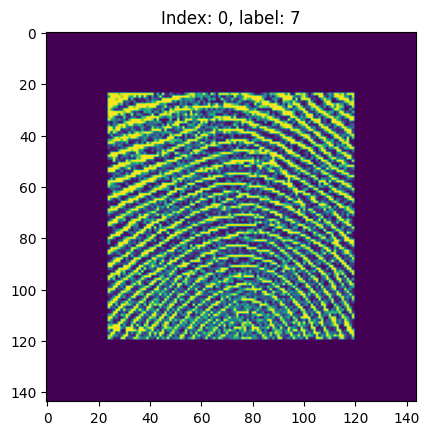

In [ ]:
idx = 0
img = train_pix.loc[idx, '0':].values.reshape(144, 144).astype(int)
label = train.loc[idx, 'label']

plt.title('Index: %i, label: %s'%(idx, label))
plt.imshow(img)
plt.show()

## Train-Test-Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_pix.values, train['label'], test_size = 0.25, random_state=42, shuffle=True)

## Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
scores = cross_val_score(rf, X_train, y_train, cv = 3, scoring = 'accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.05)


Save Model

In [ ]:
with open('./model/model_rf.pkl','wb') as f:
    pickle.dump(rf,f)

Load Model

In [ ]:
with open('model/model_rf.pkl', 'rb') as f:
    best = pickle.load(f)

In [ ]:
val_pred = best.predict(X_val)
acc = (val_pred == y_val).mean()
print("Accuracy: %0.2f" % (acc))

Accuracy: 1.00


In [ ]:
print(classification_report(y_val ,val_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

